# MOVIE RATING PREDICTION

# AUTHOR  :  Richa Mishra


# DOMAIN   : Data Science

# AIM :build a model that predicts the rating of a movie based on features like genre, director,and actors....

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [81]:
data=pd.read_csv('C:\\Users\\richa\\Downloads\\IMDb Movies India.csv (1).zip',encoding='latin-1')

In [82]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [83]:
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [84]:
X= data[['Genre','Director','Actor 1','Actor 2','Actor 3']]
y=data['Rating']

In [85]:
data.dropna(subset=['Rating'],inplace=True)

In [86]:
data = pd.get_dummies(data)

In [87]:
if data['Rating'].dtype == 'object':
    data['Rating'] = data['Rating'].astype('category').cat.codes

In [88]:
X=data.drop('Rating',axis=1)
y=data['Rating']

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
assert X_train is not None,"X_train is None"
assert y_train is not None,"y_train None"
assert X_test is not None,"X_test is None"
assert y_test is not None,"y_test None"



In [92]:
assert X_train.shape[0] == y_train.shape[0],"X_train and y_train have incompatible shapes"
assert X_test.shape[0] == y_test.shape[0],"X_test and y_test have incompatible shapes"



In [94]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)

In [97]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 1.5046923850137015


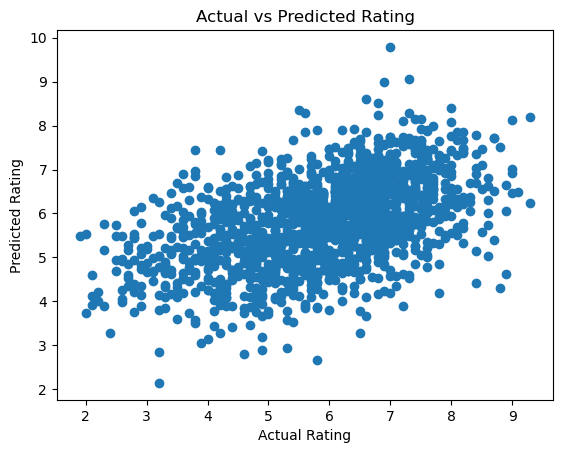

In [98]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Rating')
plt.show()